In [2]:
import requests
import json
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
from config import api_key
from pandas_profiling import ProfileReport
from scipy.stats import linregress, pearsonr
import random
import matplotlib.colors as mcolors

pd.options.display.float_format = "{:,.2f}".format

blockbusters_df = pd.read_csv("data/blockbusters.csv")
moviebudget_df= pd.read_csv("data/Movie_budget.csv")
movieid_df= pd.read_csv("data/metadata.csv")

#Merging and cleaning data 
#Merge 1
budgetbuster_df = pd.merge(moviebudget_df,blockbusters_df, how = "right", on = "Title")
budgetbuster_df = budgetbuster_df.drop(columns=["Release Date","length", "rank_in_year", "rating","Year_x", "Worldwide_gross"])
budgetbuster_df = budgetbuster_df.rename(columns={"Year_y":"Year"})
budgetbuster_df = budgetbuster_df.dropna(axis=0,inplace= False)
budgetbuster_df["Production Budget"] = (budgetbuster_df["Production Budget"].astype(float))/1000000
budgetbuster_df["Domestic Gross"] = (budgetbuster_df["Domestic Gross"].astype(float))/1000000
budgetbuster_df["Worldwide Gross"] = (budgetbuster_df["Worldwide Gross"].astype(float))/1000000
budgetbuster_df = budgetbuster_df.drop_duplicates(subset=["Title","Year"],inplace= False)
budgetbuster_df.to_csv("datacreatedcsv/budgetbuster.csv", index_label="Movie ID")
budgetbuster_df

C:\Users\a_don\AppData\Local\Temp\ipykernel_6012\3794261842.py:19: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movieid_df= pd.read_csv("data/metadata.csv")


,Rank,Title,Production Budget,Domestic Gross,Worldwide Gross,Main Genre,2nd Genre,3rd Genre,IMDB Rating,Studio,Year
0,48,Black Panther,200.00,700.06,"1,336.49",Action,Adventure,Drama,7.40,Walt Disney Pictures,2018
1,5,Avengers: Infinity War,300.00,678.82,"2,048.36",Action,Adventure,Sci-Fi,8.50,Walt Disney Pictures,2018
2,50,Incredibles 2,200.00,608.58,"1,242.81",Animation,Action,Adventure,7.80,Pixar,2018
3,144,Jurassic World: Fallen Kingdom,170.00,417.72,"1,308.32",Action,Adventure,Drama,6.20,Universal Pictures,2018
7,11,Solo: A Star Wars Story,275.00,213.77,393.15,Action,Adventure,Drama,7.00,Walt Disney Pictures,2018
...,...,...,...,...,...,...,...,...,...,...,...
442,"4,918",Annie Hall,4.00,38.25,38.25,Romance,Drama,Comedy,8.10,Metro-Goldwyn-Mayer,1977
447,"2,387",The Omen,25.00,54.61,119.30,Thriller,Horror,Drama,7.60,20th Century Fox,1976
450,44,King Kong,207.00,218.08,550.52,Horror,Fantasy,Adventure,5.80,Paramount Pictures,1976
455,445,Midway,100.00,56.85,126.82,History,Drama,Action,6.70,Universal Pictures,1976


In [3]:
#Cleaning movie_id 
movieid_df = movieid_df.drop(["adult","belongs_to_collection","budget","homepage","id","Title","original_language","overview","revenue","runtime",
                                "spoken_languages","status", "tagline","video","vote_average","vote_count","popularity","poster_path","production_companies",
                                "production_countries","genres"], axis=1, inplace = False)
movieid_df = movieid_df.dropna(axis=0,inplace= False)
movieid_df['release_date'] = pd.to_datetime(movieid_df['release_date'])
movieid_df['Year'] = movieid_df['release_date'].dt.year
movieid_df = movieid_df.drop(["release_date"], axis=1, inplace = False)
movieid_df = movieid_df.rename(columns={"imdb_id":"IMDb ID", "title":"Title"})
movieid_df.to_csv("datacreatedcsv/movieid.csv", index_label="Movie ID")
movieid_df

,IMDb ID,Title,Year
0,tt0114709,Toy Story,1995
1,tt0113497,Jumanji,1995
2,tt0113228,Grumpier Old Men,1995
3,tt0114885,Waiting to Exhale,1995
4,tt0113041,Father of the Bride Part II,1995
...,...,...,...
45460,tt0102797,Robin Hood,1991
45462,tt2028550,Century of Birthing,2011
45463,tt0303758,Betrayal,2003
45464,tt0008536,Satan Triumphant,1917


In [4]:
#Merging all csv together
csvmovies_df = pd.merge(budgetbuster_df,movieid_df, how= "left", on=["Title","Year"])
csvmovies_df = csvmovies_df.drop_duplicates(subset=["Title","Year"],inplace= False)
csvmovies_df.to_csv("datacreatedcsv/csvmovies.csv", index_label="Movie ID")
csvmovies_df

,Rank,Title,Production Budget,Domestic Gross,Worldwide Gross,Main Genre,2nd Genre,3rd Genre,IMDB Rating,Studio,Year,IMDb ID
0,48,Black Panther,200.00,700.06,"1,336.49",Action,Adventure,Drama,7.40,Walt Disney Pictures,2018,NaN
1,5,Avengers: Infinity War,300.00,678.82,"2,048.36",Action,Adventure,Sci-Fi,8.50,Walt Disney Pictures,2018,NaN
2,50,Incredibles 2,200.00,608.58,"1,242.81",Animation,Action,Adventure,7.80,Pixar,2018,NaN
3,144,Jurassic World: Fallen Kingdom,170.00,417.72,"1,308.32",Action,Adventure,Drama,6.20,Universal Pictures,2018,NaN
4,11,Solo: A Star Wars Story,275.00,213.77,393.15,Action,Adventure,Drama,7.00,Walt Disney Pictures,2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
217,"4,918",Annie Hall,4.00,38.25,38.25,Romance,Drama,Comedy,8.10,Metro-Goldwyn-Mayer,1977,tt0075686
218,"2,387",The Omen,25.00,54.61,119.30,Thriller,Horror,Drama,7.60,20th Century Fox,1976,tt0075005
219,44,King Kong,207.00,218.08,550.52,Horror,Fantasy,Adventure,5.80,Paramount Pictures,1976,tt0074751
220,445,Midway,100.00,56.85,126.82,History,Drama,Action,6.70,Universal Pictures,1976,tt0074899


In [5]:
#Retrieving Data from OMDb 
#Adding director based on title with null IMDb ID
NaNid_df = csvmovies_df[csvmovies_df["IMDb ID"].isnull()]
title =NaNid_df["Title"].tolist()
url = "http://www.omdbapi.com/?apikey=" + api_key + "&t="
title_response = []

for movie in title:
    movie_data = requests.get(url + movie).json()
    
    try:
        directors = movie_data["Director"]
    except:
        diretors = "N/A"


    title_response.append({ "Title":movie,
                    "Director": directors})
  
    print(f"{movie} was directed by {directors}")



Black Panther was directed by Ryan Coogler
Avengers: Infinity War was directed by Anthony Russo, Joe Russo
Incredibles 2 was directed by Brad Bird
Jurassic World: Fallen Kingdom was directed by J.A. Bayona
Solo: A Star Wars Story was directed by Ron Howard
Venom was directed by Ruben Fleischer
Jumanji: Welcome to the Jungle was directed by Jake Kasdan
Spider-Man: Homecoming was directed by Jon Watts
It was directed by Andy Muschietti
WALL-E was directed by Andrew Stanton
300 was directed by Zack Snyder
Superman II was directed by Richard Lester, Richard Donner


In [6]:
#Retrieving Data from OMDb 
#Adding director based on title with null IMDb ID
imdbid_df = csvmovies_df.dropna(axis=0,inplace= False)
imdbid = imdbid_df["IMDb ID"].tolist()
url = "http://www.omdbapi.com/?apikey=" + api_key + "&i="
id_response = []

for id in imdbid:
    movie_data = requests.get(url + id).json()
    
    try:
        directors = movie_data["Director"]
    except:
        diretors = "N/A"


    id_response.append({ "IMDb ID":id,
                    "Director": directors})
  
    print(f"{id} was directed by {directors}")

tt0451279 was directed by Patty Jenkins
tt3501632 was directed by Taika Waititi
tt0974015 was directed by Zack Snyder
tt3748528 was directed by Gareth Edwards
tt3498820 was directed by Anthony Russo, Joe Russo
tt1431045 was directed by Tim Miller
tt2948356 was directed by Byron Howard, Rich Moore, Jared Bush
tt2975590 was directed by Zack Snyder
tt3470600 was directed by Garth Jennings, Christophe Lourdelet
tt0369610 was directed by Colin Trevorrow
tt2395427 was directed by Joss Whedon
tt2820852 was directed by James Wan
tt2293640 was directed by Kyle Balda, Pierre Coffin
tt1951266 was directed by Francis Lawrence
tt2109248 was directed by Michael Bay
tt2015381 was directed by James Gunn
tt1587310 was directed by Robert Stromberg
tt1877832 was directed by Bryan Singer
tt1843866 was directed by Anthony Russo, Joe Russo
tt1872181 was directed by Marc Webb
tt2103281 was directed by Matt Reeves
tt2294629 was directed by Chris Buck, Jennifer Lee
tt1300854 was directed by Shane Black
tt16909

In [7]:
NaNdirect_df = pd.DataFrame(title_response)
IDdirect_df = pd.DataFrame(id_response)

In [8]:
NaNmovies_df = pd.merge(csvmovies_df,NaNdirect_df, on = "Title")
NaNmovies_df.to_csv("datacreatedcsv/NaNmovies.csv", index_label="Movie ID")
NaNmovies_df

,Rank,Title,Production Budget,Domestic Gross,Worldwide Gross,Main Genre,2nd Genre,3rd Genre,IMDB Rating,Studio,Year,IMDb ID,Director
0,48,Black Panther,200.00,700.06,"1,336.49",Action,Adventure,Drama,7.40,Walt Disney Pictures,2018,NaN,Ryan Coogler
1,5,Avengers: Infinity War,300.00,678.82,"2,048.36",Action,Adventure,Sci-Fi,8.50,Walt Disney Pictures,2018,NaN,"Anthony Russo, Joe Russo"
2,50,Incredibles 2,200.00,608.58,"1,242.81",Animation,Action,Adventure,7.80,Pixar,2018,NaN,Brad Bird
3,144,Jurassic World: Fallen Kingdom,170.00,417.72,"1,308.32",Action,Adventure,Drama,6.20,Universal Pictures,2018,NaN,J.A. Bayona
4,11,Solo: A Star Wars Story,275.00,213.77,393.15,Action,Adventure,Drama,7.00,Walt Disney Pictures,2018,NaN,Ron Howard
5,353,Venom,116.00,213.51,856.08,Action,Adventure,Drama,6.90,Columbia Pictures,2018,NaN,Ruben Fleischer
6,503,Jumanji: Welcome to the Jungle,90.00,404.51,961.63,Action,Adventure,Comedy,7.00,Sony Pictures,2017,NaN,Jake Kasdan
7,127,Spider-Man: Homecoming,175.00,334.20,878.27,Action,Adventure,Drama,7.50,Sony Pictures,2017,NaN,Jon Watts
8,1785,It,35.00,328.83,701.01,Horror,Drama,Mystery,7.40,Warner Bros,2017,NaN,Andy Muschietti
9,114,WALL-E,180.00,223.81,532.51,Animation,Animation,Adventure,8.40,Pixar,2008,NaN,Andrew Stanton


In [9]:
IDmovies_df = pd.merge(csvmovies_df,IDdirect_df, on = "IMDb ID")
IDmovies_df.to_csv("datacreatedcsv/IDmovies.csv", index_label="Movie ID")
IDmovies_df

,Rank,Title,Production Budget,Domestic Gross,Worldwide Gross,Main Genre,2nd Genre,3rd Genre,IMDB Rating,Studio,Year,IMDb ID,Director
0,192,Wonder Woman,150.00,412.56,817.69,Action,Adventure,Drama,7.50,Warner Bros,2017,tt0451279,Patty Jenkins
1,110,Thor: Ragnarok,180.00,315.06,850.48,Action,Adventure,Drama,7.90,Walt Disney Pictures,2017,tt3501632,Taika Waititi
2,7,Justice League,300.00,229.02,655.95,Action,Adventure,Drama,6.50,Warner Bros,2017,tt0974015,Zack Snyder
3,51,Rogue One: A Star Wars Story,200.00,533.54,"1,055.08",Action,Adventure,Drama,7.80,Walt Disney Pictures,2016,tt3748528,Gareth Edwards
4,18,Captain America: Civil War,250.00,408.08,"1,151.90",Action,Adventure,Sci-Fi,7.80,Walt Disney Pictures,2016,tt3498820,"Anthony Russo, Joe Russo"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,"4,918",Annie Hall,4.00,38.25,38.25,Romance,Drama,Comedy,8.10,Metro-Goldwyn-Mayer,1977,tt0075686,Woody Allen
205,"2,387",The Omen,25.00,54.61,119.30,Thriller,Horror,Drama,7.60,20th Century Fox,1976,tt0075005,Richard Donner
206,44,King Kong,207.00,218.08,550.52,Horror,Fantasy,Adventure,5.80,Paramount Pictures,1976,tt0074751,John Guillermin
207,445,Midway,100.00,56.85,126.82,History,Drama,Action,6.70,Universal Pictures,1976,tt0074899,Jack Smight


In [10]:
allmovies_df = NaNmovies_df.append(IDmovies_df)
allmovies_df.to_csv("allmoviesdata.csv", index_label="Movie ID")

C:\Users\a_don\AppData\Local\Temp\ipykernel_6012\707215395.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allmovies_df = NaNmovies_df.append(IDmovies_df)


## Is there a correlation between a movie's budget and the domestic/worldwide gross?
Answered by Eric Martinez

In [11]:
eric_df = allmovies_df= pd.read_csv("allmoviesdata.csv")

PDW_df = eric_df[["Production Budget","Domestic Gross","Worldwide Gross"]]
Prod_Domestic_df = PDW_df[['Production Budget','Domestic Gross']].copy()
Prod_World_df = PDW_df[['Production Budget','Worldwide Gross']].copy()
production_bud_df = PDW_df[(PDW_df["Production Budget"]>=0)]
domestic_gross_df = PDW_df[(PDW_df["Domestic Gross"]>=0)]
worldwide_gross_df = PDW_df[(PDW_df["Worldwide Gross"]>=0)]

PDW_df

,Production Budget,Domestic Gross,Worldwide Gross
0,200.00,700.06,"1,336.49"
1,300.00,678.82,"2,048.36"
2,200.00,608.58,"1,242.81"
3,170.00,417.72,"1,308.32"
4,275.00,213.77,393.15
...,...,...,...
216,4.00,38.25,38.25
217,25.00,54.61,119.30
218,207.00,218.08,550.52
219,100.00,56.85,126.82


#### Linear Regression for Production Budget vs Domestic Gross

R squared: 0.3232711691240378


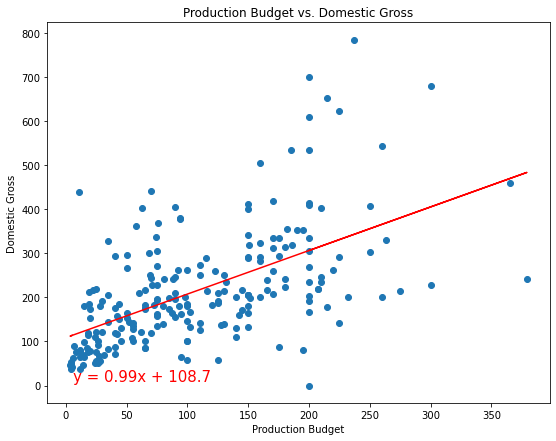

In [12]:
# Linear regression on Production Budget vs Domestic Gross
x_values = production_bud_df['Production Budget']
y_values = domestic_gross_df['Domestic Gross']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')
plt.title('Production Budget vs. Domestic Gross')

print(f"R squared: {rvalue**2}")

plt.show()

**Analysis:** Linear regression on scatter plot showing an r squared value of 0.32.

##### Linear Regression for Production Budget vs Worldwide Gross

R squared: 0.42284522417007536


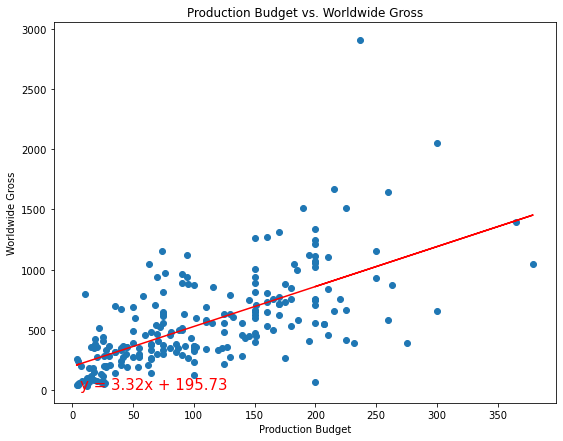

In [13]:
# Linear regression on Production Budget vs Worldwide Gross
x_values = production_bud_df['Production Budget']
y_values = worldwide_gross_df['Worldwide Gross']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Production Budget vs. Worldwide Gross')

print(f"R squared: {rvalue**2}")

plt.show()

**Analysis:** Linear regression on scatter plot showing an r squared value of 0.42.

### Overall Analysis

At first glance I was of the opinion that the higher the movie budget the more money it was going to make domestically/worldwide. However the domestic r-squared value is .32, the worldwide r-squared value is slightly higher at .42 and the points on the scatter plot have a greater dispersion the higher the budget gets. I would say that a higher movie budget does not fit our assumption that the greater the budget the greater the profits.

# Over the years how has a movie's budget changed, and has there been a correlating change in gross income, domestic and worldwide? 
Answered by Adrian Aguilar

In [14]:
ww_gross = allmovies_df= pd.read_csv("allmoviesdata.csv")

year = ww_gross['Year']
wwg = ww_gross['Worldwide Gross']
prod_budget= ww_gross["Production Budget"]
domestic= ww_gross["Domestic Gross"]
ww_gross["Worldwide Gross"] = (ww_gross["Worldwide Gross"].astype(float))
ww_gross["Production Budget"] = (ww_gross["Production Budget"].astype(float))
domestic= ww_gross["Domestic Gross"]= (ww_gross["Production Budget"].astype(float))
ww_gross = ww_gross.sort_values(by=['Year'], ascending=True)
ww_gross

,Movie ID,Rank,Title,Production Budget,Domestic Gross,Worldwide Gross,Main Genre,2nd Genre,3rd Genre,IMDB Rating,Studio,Year,IMDb ID,Director
220,208,"4,676",The Return of the Pink Panther,5.00,5.00,41.83,Thriller,Crime,Comedy,7.10,Metro-Goldwyn-Mayer,1975,tt0072081,Blake Edwards
217,205,"2,387",The Omen,25.00,25.00,119.30,Thriller,Horror,Drama,7.60,20th Century Fox,1976,tt0075005,Richard Donner
219,207,445,Midway,100.00,100.00,126.82,History,Drama,Action,6.70,Universal Pictures,1976,tt0074899,Jack Smight
218,206,44,King Kong,207.00,207.00,550.52,Horror,Fantasy,Adventure,5.80,Paramount Pictures,1976,tt0074751,John Guillermin
214,202,"2,324",A Bridge Too Far,26.00,26.00,50.80,War,History,Drama,7.40,Metro-Goldwyn-Mayer,1977,tt0075784,Richard Attenborough
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,11,Solo: A Star Wars Story,275.00,275.00,393.15,Action,Adventure,Drama,7.00,Walt Disney Pictures,2018,NaN,Ron Howard
3,3,144,Jurassic World: Fallen Kingdom,170.00,170.00,"1,308.32",Action,Adventure,Drama,6.20,Universal Pictures,2018,NaN,J.A. Bayona
2,2,50,Incredibles 2,200.00,200.00,"1,242.81",Animation,Action,Adventure,7.80,Pixar,2018,NaN,Brad Bird
1,1,5,Avengers: Infinity War,300.00,300.00,"2,048.36",Action,Adventure,Sci-Fi,8.50,Walt Disney Pictures,2018,NaN,"Anthony Russo, Joe Russo"


The r-value is 0.4445871942877436


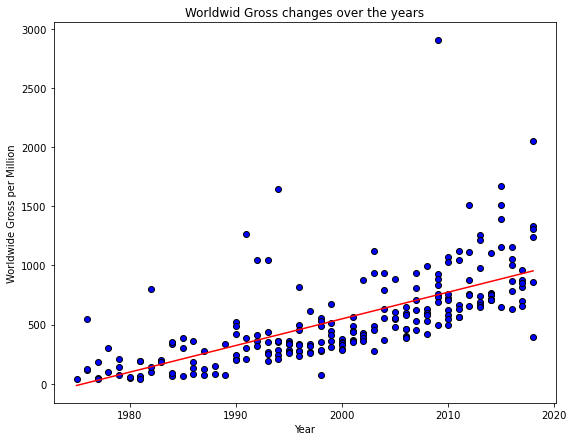

In [15]:
# Incorporate the other graph properties
(slope, intercept, rvalue, pvalue, stderr) = linregress(year, wwg)
regress_val=(year * slope + intercept)
correlation= pearsonr(year, domestic)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(year,wwg, marker='o',edgecolors='black', facecolors='blue', alpha=1.0,)
plt.plot(year, regress_val, "r-")
plt.xlabel("Year")
plt.ylabel("Worldwide Gross per Million")
plt.title('Worldwid Gross changes over the years')
print(f"The r-value is {rvalue**2}")

# Should be run twice to show graph.
plt.show()

The r-value is 0.4808010904573011


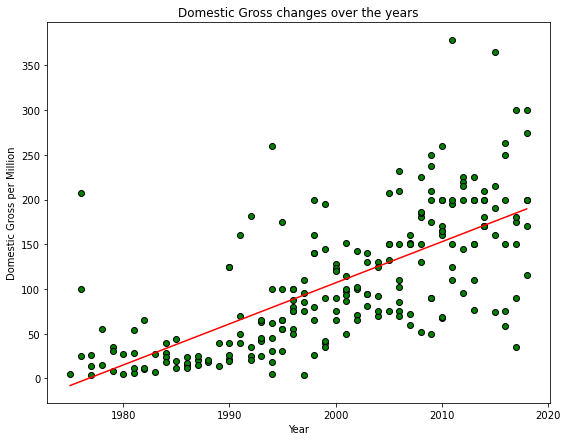

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(year, domestic)
regress_val=(year * slope + intercept)
correlation= pearsonr(year, domestic)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(year,domestic, marker='o',edgecolors='black', facecolors='g', alpha=1.0,)
plt.plot(year, regress_val, "r-")
plt.xlabel("Year")
plt.ylabel("Domestic Gross per Million")
plt.title('Domestic Gross changes over the years')
print(f"The r-value is {rvalue**2}")
plt.show()

<AxesSubplot:title={'center':'Production Budget Changes'}, xlabel='Year', ylabel='Production Budget per Million'>

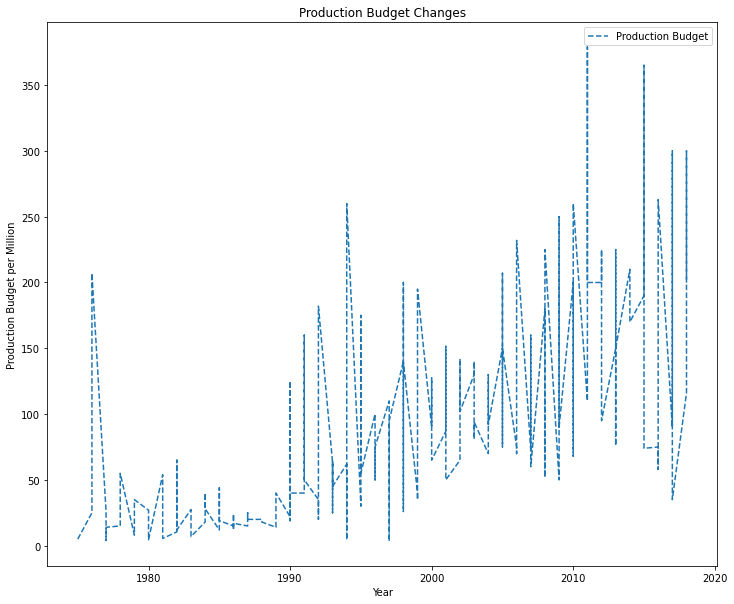

In [17]:
ww_gross.plot.line("Year", "Production Budget", ylabel = "Production Budget per Million", linestyle='dashed', figsize=(12, 10), title= 'Production Budget Changes')

### Overall Analysis: 

We can clearly see changes over the years in budgets both worldwide and domestic. Our datasets started from 1975 and ran all through 2018 using American made movies only.  The cost of movies have had a steady incline. Possibly due to inflation and changes in technology. There are some very high outliers when it comes to budgets but for the most part has been a steady inlcine instead of drastic changes in budgets. 

# How does a production's budget breakdown in per genre, and does have an impact on the worldwide or domestic gross? Based upon that, is there a difference among studios and the production budget?
Answered by Tony Ponce

In [18]:
tony_df = allmovies_df= pd.read_csv("allmoviesdata.csv")

#GroupBy Main Genre to isoloate Average Production Budget, Average Domestic Gross and Average Worldwide Gross. 
production_budget_genre_df = tony_df.groupby(["Main Genre"]).mean()["Production Budget"]
domestic_gross_genre_df = tony_df.groupby(["Main Genre"]).mean()["Domestic Gross"]
worldwide_gross_genre_df = tony_df.groupby(["Main Genre"]).mean()["Worldwide Gross"]
avg_by_genre = pd.DataFrame({"Average Production Budget by Genre": (production_budget_genre_df),
                            "Average Domestic Gross by Genre": (domestic_gross_genre_df),
                            "Average Worldwide Gross by Genre": (worldwide_gross_genre_df)})
avg_by_genre

,Average Production Budget by Genre,Average Domestic Gross by Genre,Average Worldwide Gross by Genre
Main Genre,,,
Action,190.50,376.95,987.08
Animation,127.69,254.13,699.99
Comedy,108.73,243.82,619.11
Crime,63.75,133.13,287.95
Drama,102.54,219.75,495.22
Family,83.67,121.48,275.80
Fantasy,137.41,248.71,709.34
History,101.67,113.91,306.48
Horror,121.00,273.45,625.77


<function matplotlib.pyplot.show(close=None, block=None)>

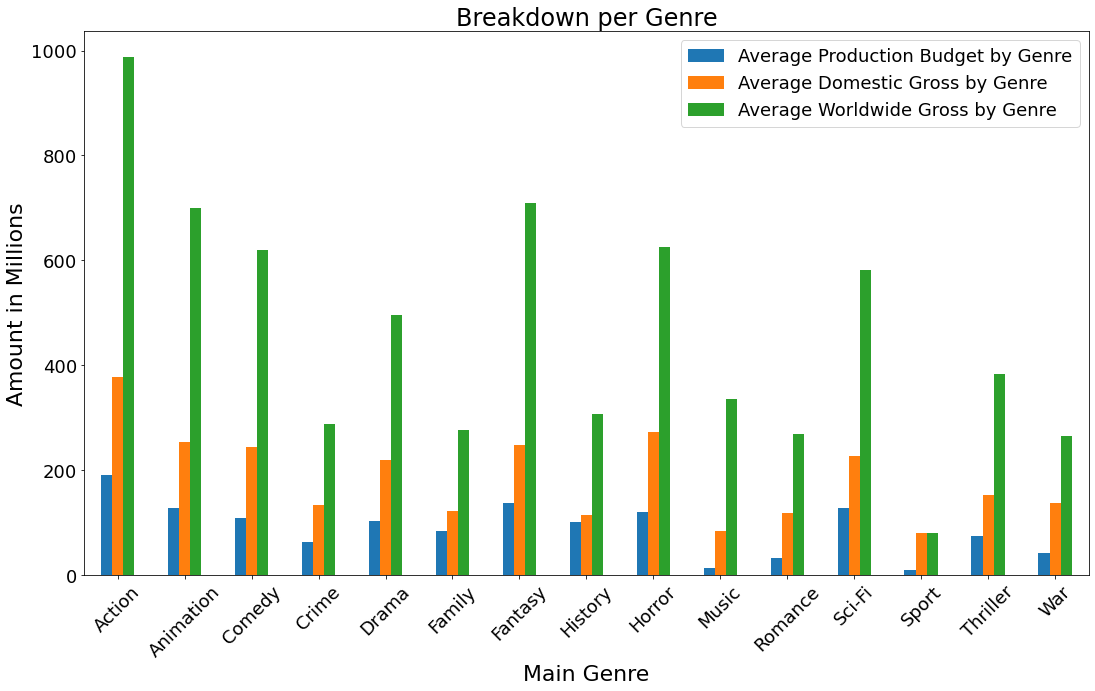

In [19]:
#Bar Chart of Average Production Budget, Average Domestic Gross and Average Worldwide Gross broken down by Main Genre.
avg_by_genre.plot(kind='bar', fontsize=18,figsize=(18,10))
plt.title('Breakdown per Genre', fontsize=24)
plt.xlabel('Main Genre', fontsize=22)
plt.ylabel('Amount in Millions', fontsize=22)
plt.legend(fontsize=18)
plt.xticks(rotation=45)
plt.show 

**Analysis of Average Production Budget, Domestic Gross and Worldwide Gross per Genre:** Breakdown of average production costs per main movie genre reflects that Action movies account for the largest average budget per movie with an average of $190,500,000.00 per movie. Action movies also accounted for the highest average Worldwide and Domestic Gross.

In [20]:
#GroupBy to isolate amount of movies produced per studio.
studios_df = allmovies_df.groupby(["Studio"])
studios_grouped_df = studios_df.size().sort_values(ascending=False)
studios_grouped_df = pd.DataFrame(studios_grouped_df)
studios_grouped_df 

,0
Studio,
Walt Disney Pictures,38
Warner Bros,38
Universal Pictures,33
Paramount Pictures,32
20th Century Fox,23
Metro-Goldwyn-Mayer,14
Columbia Pictures,12
DreamWorks,10
Sony Pictures,9


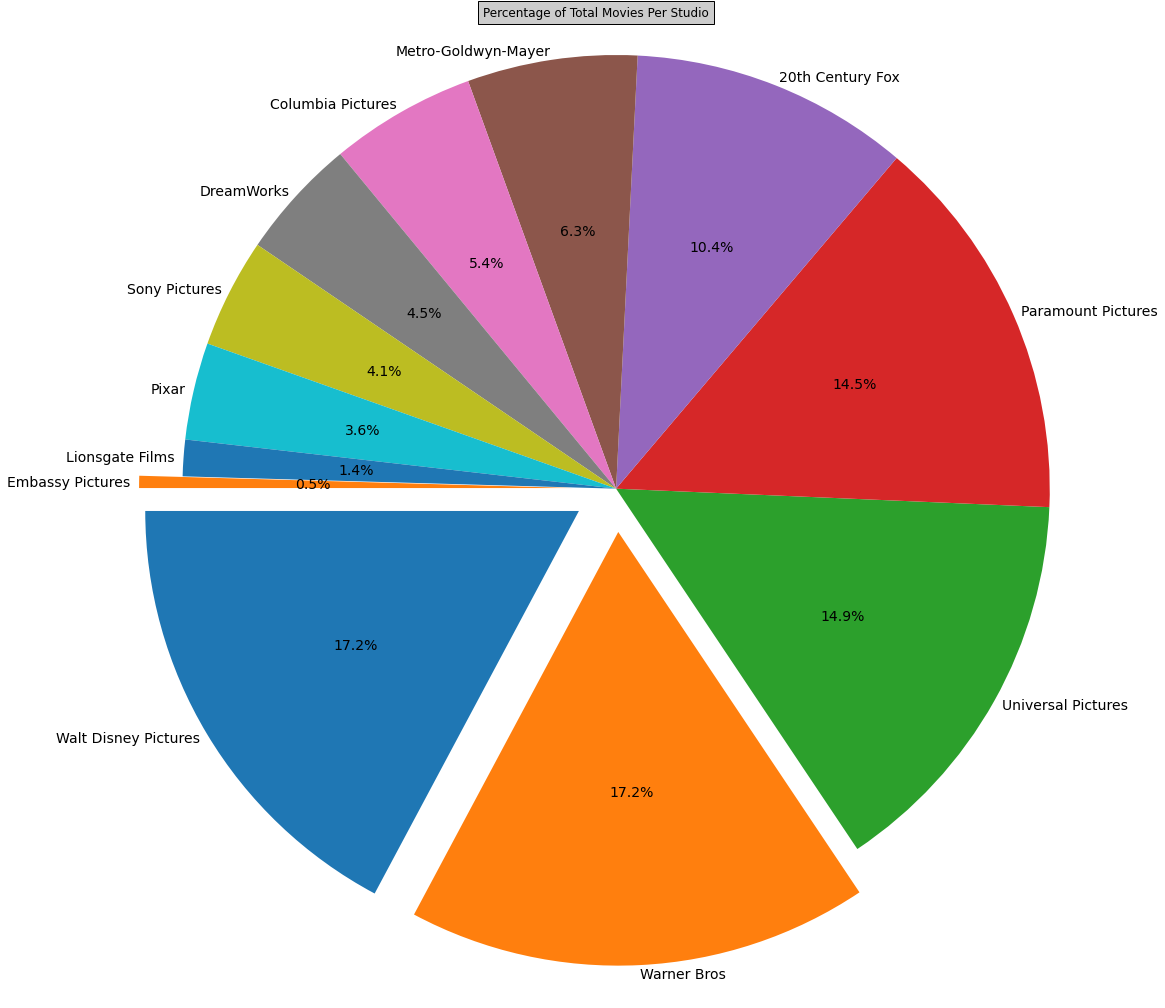

In [21]:
#Pie chart to illustrate total breakdown of movies per Main Genre broken down by Studio.
number_of_colors = 12

# Labels for the sections of our pie chart
labels = ["Walt Disney Pictures", "Warner Bros", "Universal Pictures", "Paramount Pictures", "20th Century Fox", "Metro-Goldwyn-Mayer", "Columbia Pictures", "DreamWorks", "Sony Pictures", "Pixar", "Lionsgate Films", "Embassy Pictures"]

# The values of each section of the pie chart
sizes = [38, 38, 33, 32, 23, 14, 12, 10, 9, 8, 3, 1]

# The colors of each section of the pie chart
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = number_of_colors)

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1,0.1,0,0,0,0,0,0,0,0,0,0.1)

fig1, ax1 = plt.subplots(figsize=(18,18))
ax1.pie(sizes, labels=labels,  labeldistance=1.02, autopct="%0.1f%%", textprops={'fontsize': 14}, startangle=180, explode=explode, shadow=False)
ax1.axis('equal') 
plt.title("Percentage of Total Movies Per Studio",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

**Analysis of Total Movies Per Studio:** Breakdown of toal movies produces per studio reflect that Walt Disney Pictures and Warner Bros each had the greatest amount of movies with 38 each. Embassy Pictures accounts for the fewest amounts of movies with only one movie.

In [22]:
# GroupBy to determine Average Production Budget per Studio in millions. 
studio_budget = allmovies_df.groupby(["Studio"]).mean()["Production Budget"]
studio_budget = pd.DataFrame(studio_budget)
studio_budget

,Production Budget
Studio,
20th Century Fox,86.78
Columbia Pictures,123.38
DreamWorks,91.80
Embassy Pictures,12.00
Lionsgate Films,92.67
Metro-Goldwyn-Mayer,57.39
Paramount Pictures,90.09
Pixar,134.50
Sony Pictures,93.78


<function matplotlib.pyplot.show(close=None, block=None)>

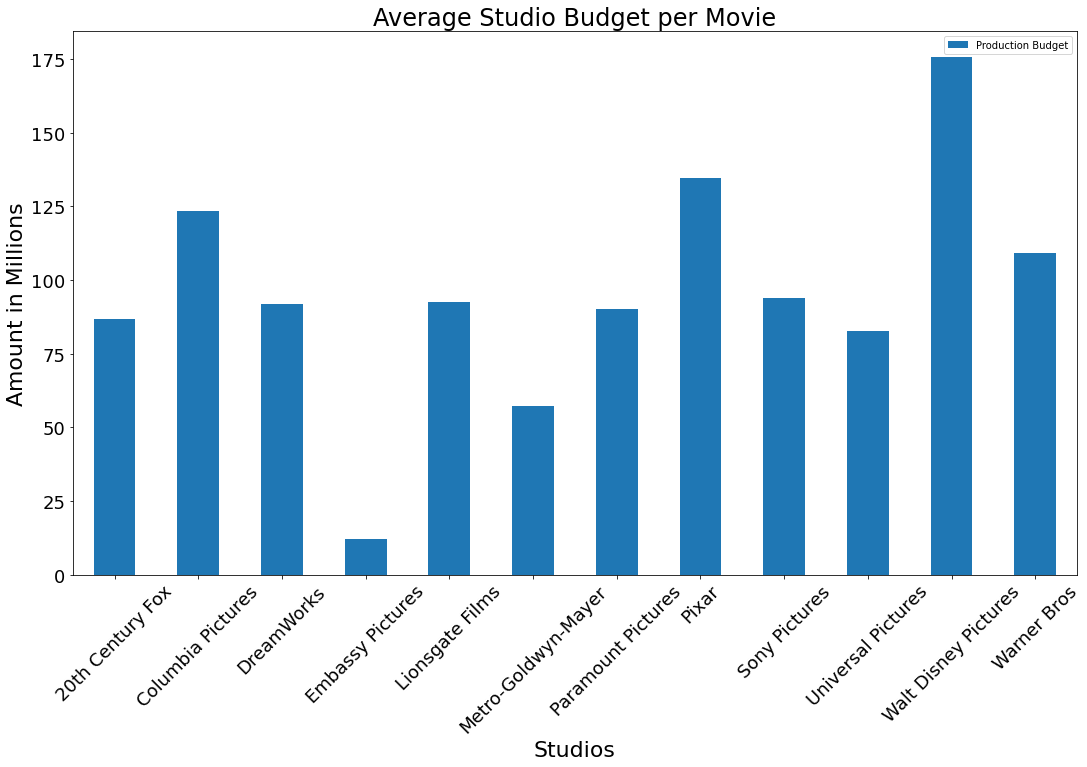

In [23]:
studio_budget.plot(kind='bar', fontsize=18,figsize=(18,10))
plt.title('Average Studio Budget per Movie', fontsize=24)
plt.xlabel('Studios', fontsize=22)
plt.ylabel('Amount in Millions', fontsize=22)
plt.xticks(rotation=45)
plt.show

**Anlysis of Average Production Budget Per Studio:** Breakdown of average production budget per studio reflects Walt Disney Pictures averaged the highest production budget per movie with an average budget of $175,676,384.71. 

In [24]:
# GroupBy to isolate amount of Action genre movies produced by studio. 
action_counts=allmovies_df.groupby(['Studio', 'Main Genre']).size().reset_index(name='Counts')
action_genre="Action"
action_counts.loc[action_counts['Main Genre']==action_genre].sort_values(by='Counts', ascending=False)

,Studio,Main Genre,Counts
56,Walt Disney Pictures,Action,7
41,Sony Pictures,Action,3
46,Universal Pictures,Action,3
65,Warner Bros,Action,3
0,20th Century Fox,Action,1
8,Columbia Pictures,Action,1
21,Lionsgate Films,Action,1
29,Paramount Pictures,Action,1


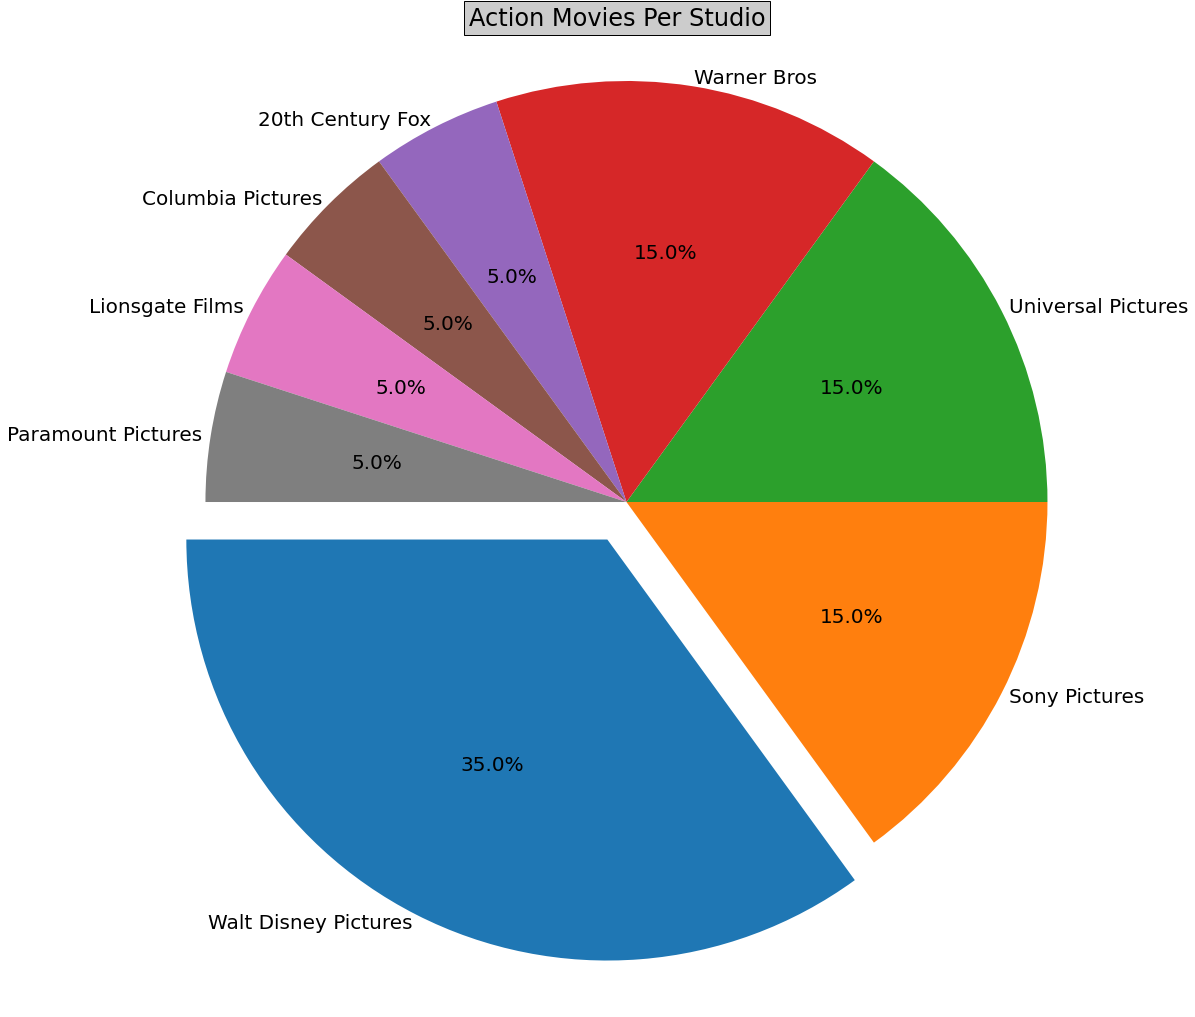

In [25]:
number_of_colors = 8

# Labels for the sections of our pie chart
labels = ["Walt Disney Pictures", "Sony Pictures", "Universal Pictures", "Warner Bros ", "20th Century Fox", "Columbia Pictures", "Lionsgate Films", "Paramount Pictures"]

# The values of each section of the pie chart
sizes = [7, 3, 3, 3, 1, 1, 1, 1]

# The colors of each section of the pie chart
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = number_of_colors)

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1,0,0,0,0,0,0,0,)

fig1, ax1 = plt.subplots(figsize=(18,18))
ax1.pie(sizes, labels=labels,labeldistance=1.02, autopct="%0.1f%%", startangle=180, textprops={'fontsize': 20}, explode=explode, rotatelabels = False, shadow=False)
ax1.axis('equal') 
plt.title("Action Movies Per Studio", fontsize=24,bbox={'facecolor':'0.8', 'pad':5})
plt.show()

**Analysis of Action Movies Per Studio:** Pie chart illustrates Walt Disney produced the most Action movies with a total count of 7. 

### Overall Analysis:
The question for this portion was if Genre would impact the Overall Production Budget, Domestic Gross and Worldwide Gross. The data illustrates that the genre does directly impact the average production budget. The average production budget for Action movies was approximately 190,000,000 dollars per movie which was approximately 50,000,000 dollars higher then the next highest category which was Fantasy at approximately 140,000,000 dollars per movie. Additionally, the average Domestic Gross (377 mil) and Worldwide Gross (987 mil) is also the highest for Action movies. This is approximately 100,000,000 dollars domestically and 80,000,0000 dollars wordlwide higher than the next highest genre's, which were Horror and Fantasy. This also confirms that the genre does impact Domestic and Worldwide Gross. 

It was interesting to note that Walt Disney pictures had one of the highest production counts but also averaged the highest production budget per movie. This would lead you to assume that if we looked primarily at the Action genre, we should expect to see Walt Disney Picture with the highest count. Data proves this to be correct as Walt Disney has the highest amount of Action movies with a total count of seven and an overall highest average production budget per movie with an average of approximately 176,000,000 dollars per movie. 

# Will a movie's production budget be reflected in the ratings of that movie?
Answered by Robert Casiano

In [27]:
robert_df = pd.read_csv("allmoviesdata.csv")

# Identifiying the movies with the highest IMDB ratings
highestrated_df = robert_df.loc[robert_df["IMDB Rating"] >= 8.3, [
    "Title", "Production Budget", "IMDB Rating", "Year", "Studio", "Director"]]
highestrated_df

,Title,Production Budget,IMDB Rating,Year,Studio,Director
1,Avengers: Infinity War,300.00,8.50,2018,Walt Disney Pictures,"Anthony Russo, Joe Russo"
9,WALL-E,180.00,8.40,2008,Pixar,Andrew Stanton
52,Toy Story 3,200.00,8.40,2010,Walt Disney Pictures,Lee Unkrich
54,Inception,160.00,8.80,2010,Warner Bros,Christopher Nolan
66,Up,175.00,8.30,2009,Pixar,"Pete Docter, Bob Peterson"
69,The Dark Knight,185.00,9.00,2008,Warner Bros,Christopher Nolan
98,The Lord of the Rings: The Return of the King,94.00,8.90,2003,Warner Bros,Peter Jackson
128,Saving Private Ryan,65.00,8.60,1998,DreamWorks,Steven Spielberg
147,Toy Story,30.00,8.30,1995,Walt Disney Pictures,John Lasseter
154,The Lion King,260.00,8.50,1994,Walt Disney Pictures,"Roger Allers, Rob Minkoff"


In [28]:
highbudavg = highestrated_df["Production Budget"].mean()

print(f"The average budget of the movies with the highest IMDB Ratings was {highbudavg}")

The average budget of the movies with the highest IMDB Ratings was 140.41666666666666


In [29]:
highrateavg = highestrated_df["IMDB Rating"].mean()

print(f"The average IMDB rating of the movies with the highest IMDB Ratings was {highrateavg}")

The average IMDB rating of the movies with the highest IMDB Ratings was 8.549999999999999


Text(0, 0.5, 'IMBD Rating')

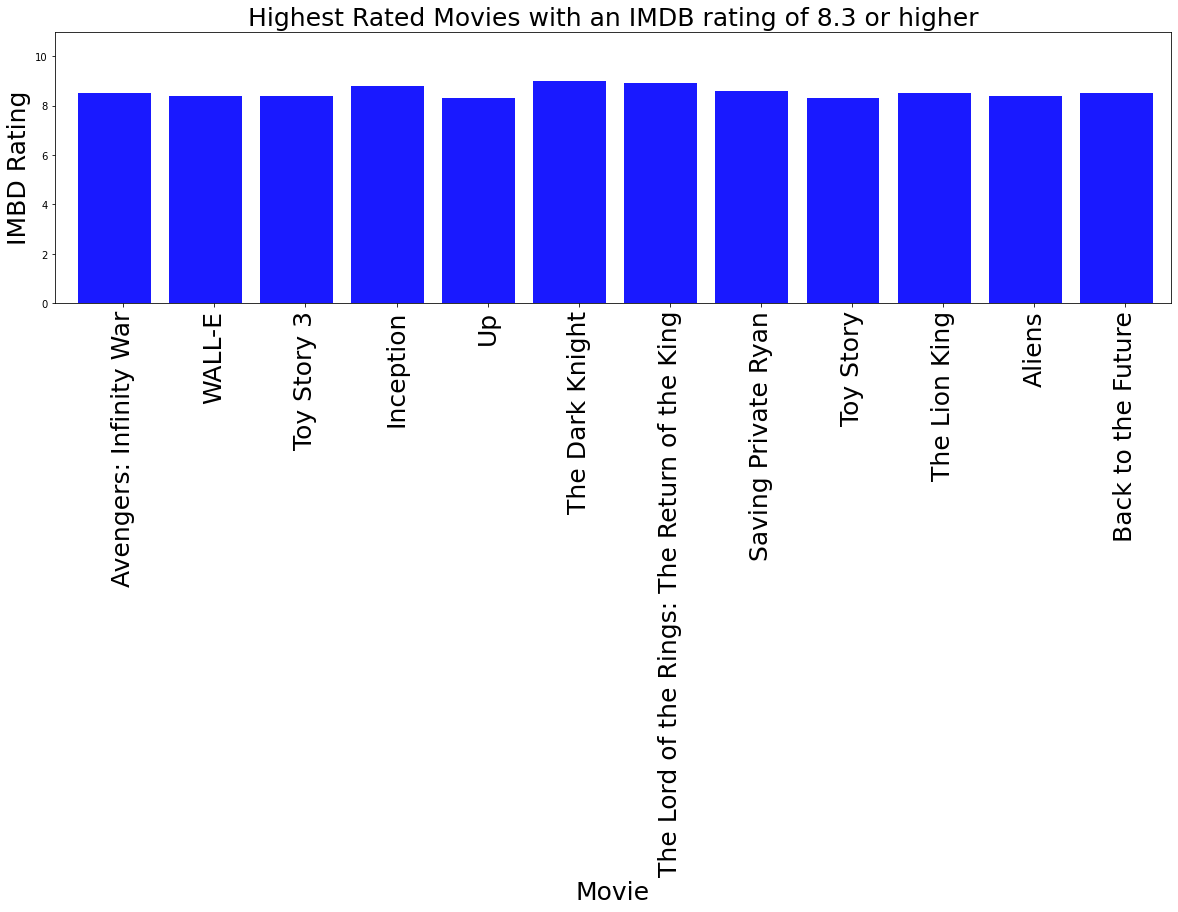

In [30]:
x_axishighrate = np.arange(len(highestrated_df))
tick_locations = [value+0.5 for value in x_axishighrate]

plt.figure(figsize=(20,5))
plt.bar(x_axishighrate, highestrated_df["IMDB Rating"], color='blue', alpha=0.9, align="edge")
plt.xticks(tick_locations, highestrated_df["Title"], rotation="90", fontsize=25)
plt.xlim(-0.25, len(x_axishighrate))
plt.ylim(0, max(highestrated_df["IMDB Rating"])+2)
plt.title("Highest Rated Movies with an IMDB rating of 8.3 or higher",fontsize=25)
plt.xlabel("Movie", fontsize=25)
plt.ylabel("IMBD Rating", fontsize=25)

In [31]:
# Identifiying the movies with the lowest IMDB ratings
lowestrated_df = robert_df.loc[robert_df["IMDB Rating"] <= 5.5, [
    "Title", "Production Budget", "IMDB Rating", "Year", "Studio", "Director"]]
lowestrated_df

,Title,Production Budget,IMDB Rating,Year,Studio,Director
50,The Smurfs,110.00,5.50,2011,Columbia Pictures,Raja Gosnell
56,The Twilight Saga: Eclipse,68.00,4.90,2010,Lionsgate Films,David Slade
67,The Twilight Saga: New Moon,50.00,4.60,2009,Lionsgate Films,Chris Weitz
129,Godzilla,160.00,5.30,1998,Sony Pictures,Roland Emmerich
144,The Nutty Professor,55.00,5.50,1996,Universal Pictures,Tom Shadyac
150,Batman Forever,100.00,5.40,1995,Warner Bros,Joel Schumacher
158,The Flintstones,45.00,4.80,1994,Universal Pictures,Brian Levant


In [32]:
lowbudavg = lowestrated_df["Production Budget"].mean()

print(f"The average budget of the movies with the lowest IMDB Ratings was {lowbudavg}")

The average budget of the movies with the lowest IMDB Ratings was 84.0


In [33]:
lowrateavg = lowestrated_df["IMDB Rating"].mean()

print(f"The average rating of the movies with the lowest IMDB Ratings was {lowrateavg}")

The average rating of the movies with the lowest IMDB Ratings was 5.142857142857143


Text(0, 0.5, 'IMBD Rating')

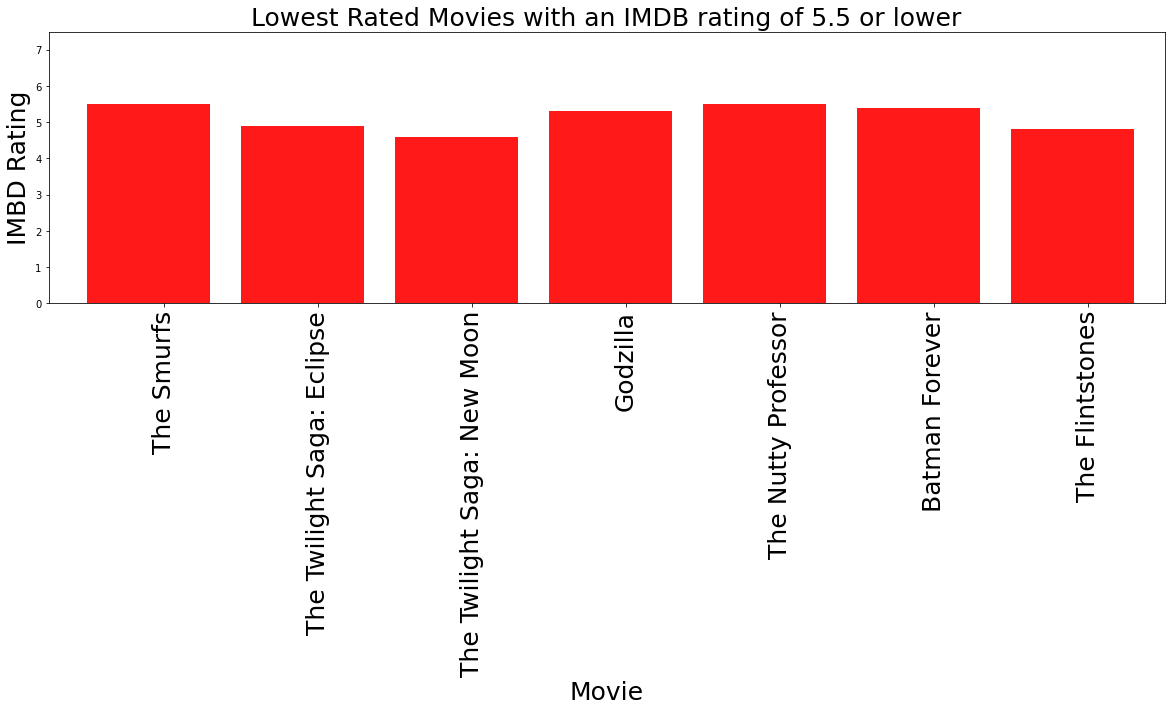

In [34]:
x_axislowrate = np.arange(len(lowestrated_df))
tick_locations = [value+0.5 for value in x_axislowrate]

plt.figure(figsize=(20,5))
plt.bar(x_axislowrate, lowestrated_df["IMDB Rating"], color='red', alpha=0.9, align="edge")
plt.xticks(tick_locations, lowestrated_df["Title"], rotation="90", fontsize=25)
plt.xlim(-0.25, len(x_axislowrate))
plt.ylim(0, max(lowestrated_df["IMDB Rating"])+2)
plt.title("Lowest Rated Movies with an IMDB rating of 5.5 or lower",fontsize=25)
plt.xlabel("Movie", fontsize=25)
plt.ylabel("IMBD Rating", fontsize=25)

In [39]:
# Identifiying the movies with the highest Production Budgets
highestcost_df = robert_df.loc[robert_df["Production Budget"] >= 230, [
    "Title", "Production Budget", "IMDB Rating", "Year", "Studio", "Director"]]
highestcost_df

,Title,Production Budget,IMDB Rating,Year,Studio,Director
1,Avengers: Infinity War,300.00,8.50,2018,Walt Disney Pictures,"Anthony Russo, Joe Russo"
4,Solo: A Star Wars Story,275.00,7.00,2018,Walt Disney Pictures,Ron Howard
14,Justice League,300.00,6.50,2017,Warner Bros,Zack Snyder
16,Captain America: Civil War,250.00,7.80,2016,Walt Disney Pictures,"Anthony Russo, Joe Russo"
19,Batman v Superman: Dawn of Justice,263.00,6.50,2016,Warner Bros,Zack Snyder
22,Avengers: Age of Ultron,365.00,7.40,2015,Walt Disney Pictures,Joss Whedon
47,Pirates of the Caribbean: On Stranger Tides,379.00,6.70,2011,Walt Disney Pictures,Rob Marshall
58,Tangled,260.00,7.80,2010,Walt Disney Pictures,"Nathan Greno, Byron Howard"
61,Avatar,237.00,7.90,2009,20th Century Fox,James Cameron
62,Harry Potter and the Half-Blood Prince,250.00,7.50,2009,Warner Bros,David Yates


In [40]:
high_budavg = highestcost_df["Production Budget"].mean()

print(f"The average budget of the movies with production budgets of $230 million or higher was {high_budavg}")

The average budget of the movies with production budgets of $230 million or higher was 280.9166666666667


In [41]:
high_rateavg = highestcost_df["IMDB Rating"].mean()

print(f"The average rating of the movies with production budgets of $230 million or higher was {high_rateavg}")

The average rating of the movies with production budgets of $230 million or higher was 7.349999999999999


Text(0, 0.5, 'Production Cost')

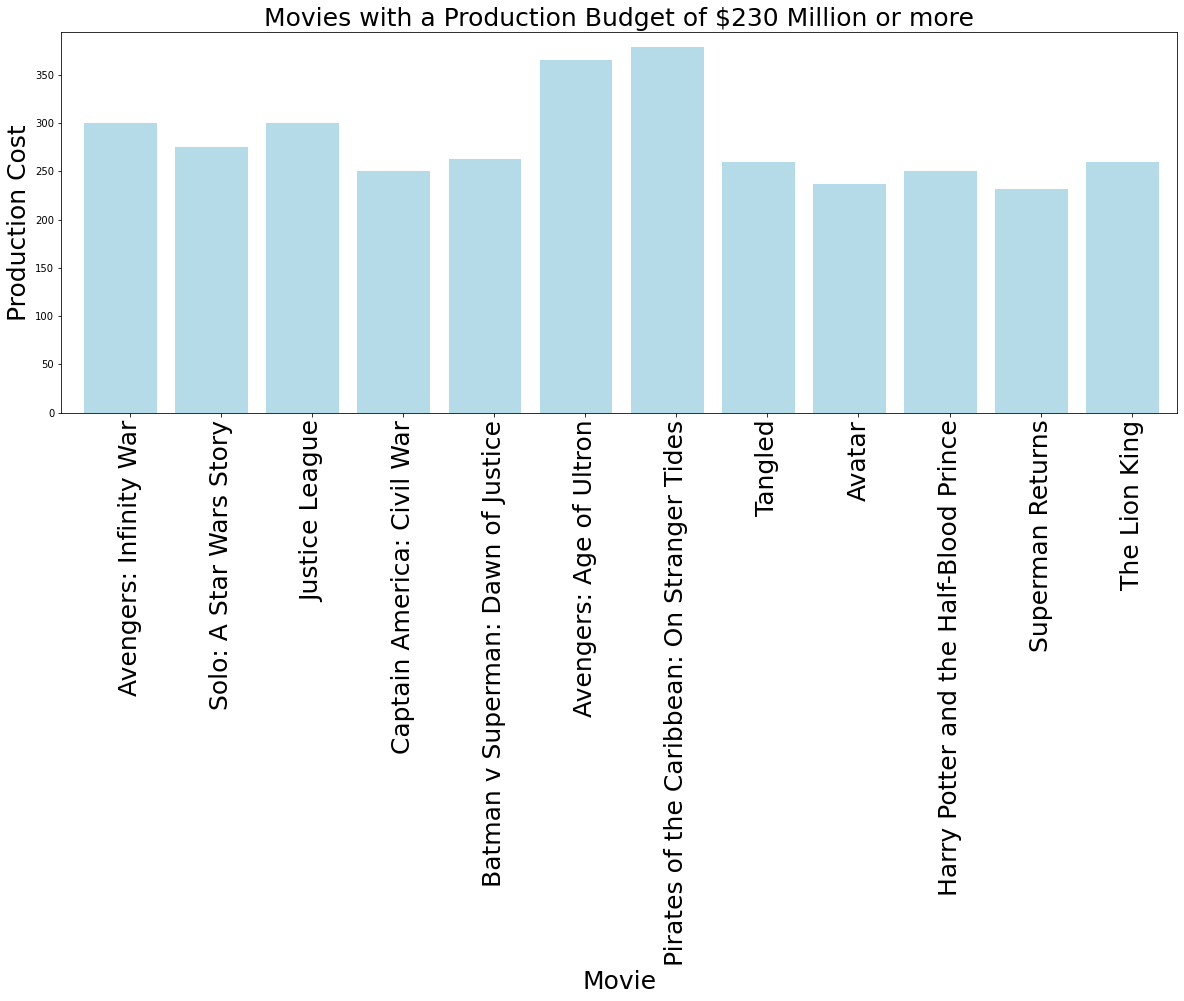

In [42]:
x_axishighbud = np.arange(len(highestcost_df))
tick_locations = [value+0.5 for value in x_axishighbud]

plt.figure(figsize=(20,7))
plt.bar(x_axishighbud, highestcost_df["Production Budget"], color='lightblue', alpha=0.9, align="edge")
plt.xticks(tick_locations, highestcost_df["Title"], rotation="90", fontsize=25)
plt.xlim(-0.25, len(x_axishighbud))
plt.ylim(0, max(highestcost_df["Production Budget"])+15)
plt.title("Movies with a Production Budget of $230 Million or more",fontsize=25)
plt.xlabel("Movie", fontsize=25)
plt.ylabel("Production Cost", fontsize=25)

In [43]:
# Identifiying the movies with the lowest Production Budgets
lowestcost_df = allmovies_df.loc[allmovies_df["Production Budget"] <= 12, [
    "Title", "Production Budget", "IMDB Rating", "Year", "Studio", "Director"]]
lowestcost_df

,Title,Production Budget,IMDB Rating,Year,Studio,Director
138,The Full Monty,3.50,7.20,1997,20th Century Fox,Peter Cattaneo
159,Four Weddings and a Funeral,4.50,7.10,1994,Universal Pictures,Mike Newell
191,The Golden Child,12.00,5.80,1986,Paramount Pictures,Michael Ritchie
194,Witness,12.00,7.50,1985,Paramount Pictures,Peter Weir
199,Flashdance,7.00,6.10,1983,Paramount Pictures,Adrian Lyne
201,E.T. the Extra-Terrestrial,10.50,7.90,1982,Universal Pictures,Steven Spielberg
202,Star Trek II: The Wrath of Khan,12.00,7.70,1982,Paramount Pictures,Nicholas Meyer
204,Chariots of Fire,5.50,7.20,1981,Warner Bros,Hugh Hudson
206,Time Bandits,12.00,7.00,1981,Embassy Pictures,Terry Gilliam
207,The Blue Lagoon,4.50,5.70,1980,Columbia Pictures,Randal Kleiser


In [44]:
low_budavg = lowestcost_df["Production Budget"].mean()

print(f"The average budget of the movies with production budgets of $12 million or lower was {low_budavg}")

The average budget of the movies with production budgets of $12 million or lower was 7.730769230769231


In [45]:
low_rateavg = lowestcost_df["IMDB Rating"].mean()

print(f"The average rating of the movies with production budgets of $12 million or lower was {low_rateavg}")

The average rating of the movies with production budgets of $12 million or lower was 7.084615384615384


Text(0, 0.5, 'Production Cost')

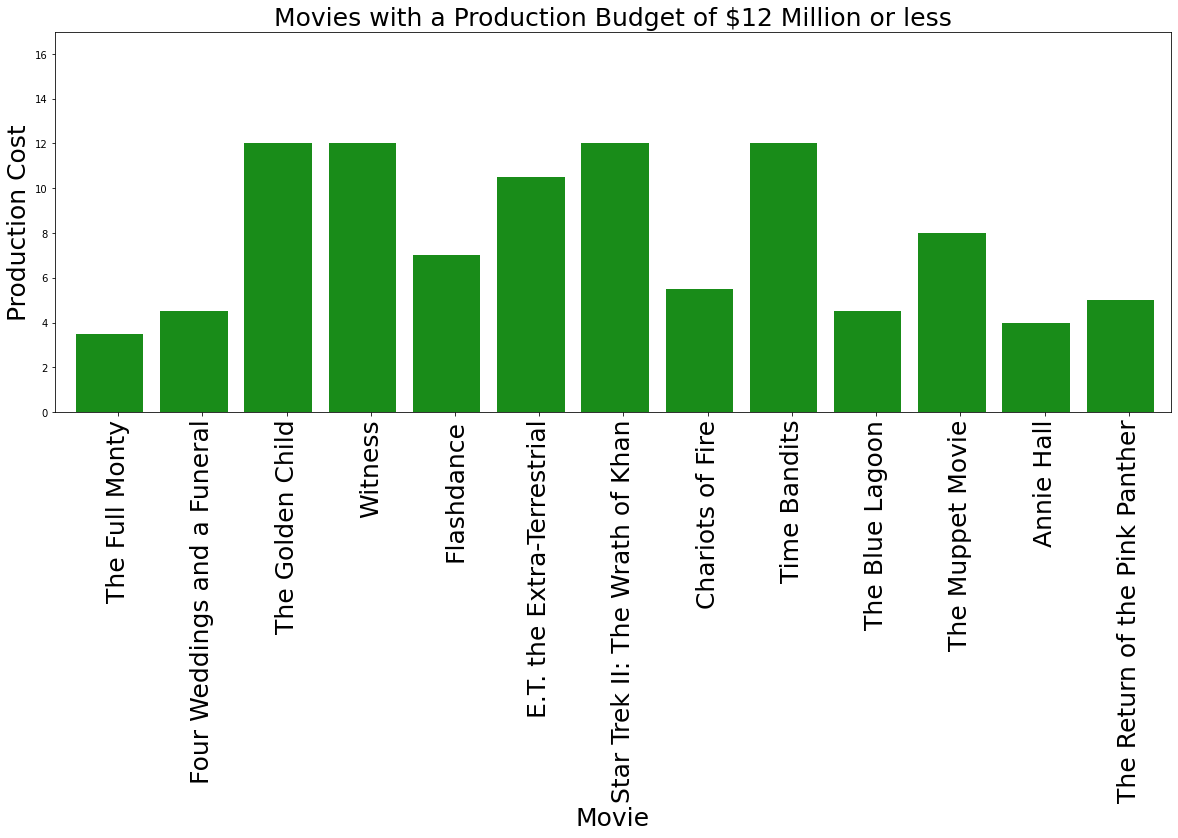

In [47]:
x_axislowbud = np.arange(len(lowestcost_df))
tick_locations = [value+0.5 for value in x_axislowbud]

plt.figure(figsize=(20,7))
plt.bar(x_axislowbud, lowestcost_df["Production Budget"], color='green', alpha=0.9, align="edge")
plt.xticks(tick_locations, lowestcost_df["Title"], rotation="90", fontsize=25)
plt.xlim(-0.25, len(x_axislowbud))
plt.ylim(0, max(lowestcost_df["Production Budget"])+5)
plt.title("Movies with a Production Budget of $12 Million or less",fontsize=25)
plt.xlabel("Movie", fontsize=25)
plt.ylabel("Production Cost", fontsize=25)

### Overall Analysis:
When reviewing the data, we initially wanted to identify the movies with the highest IMDB ratings and the ones with the lowest IMDB ratings and then compare how the budgets for each data set identified. Within the data compiled, there was 12 movies identified as having an IMDB rating of equal or greater than 8.3 and each movie had an average budget of roughly 140 million dollars. The highest rated movie per the data compiled was The Dark Knight which had a production budget of 185 million dollars and achieved a 9.0 IMDB rating. 

Conversely there was 7 movies identified as having an IMDB rating equal or less than 5.5 and each movie had an average budget of roughly 84 million dollars. The lowest rated movie per the data complied was The Twilight Saga: New Moon which had a production budget of 50 million dollars and achieved a 4.6 IMDB rating. 

We then wanted to identify the movies with the highest and lowest production budgets and then compare how their IMDB ratings were.  Within the data compiled, there was 12 movies identified as having a production budget of 230 million dollars or higher. Each movie had an average budget of roughly 281 million dollars and an average IMDB rating of 7.35. In terms of the lowest production budgets, there was 13 films identified as having a production budget of 12 million dollars or less. Each movie had an average budget of roughly 7.7 million dollars and an average IMDB rating of 7.08. 

Based upon the information compiled we can confirm that there is a correlation with the production budget of a film and their ratings. An interesting observation was the highest budget film, Pirates of the Carribbean: On Stranger Tides had a production budget of 379 million dollars and only obtained a 6.7 IMDB rating; however, the lowest production budget film of The Full Monty obtained a 7.2 IMDB rating with a production budget of only 3.5 million dollars. 

# Does the director affect the gross outcome or does the budget?
Answered by Annie Donnelly

In [ ]:
annie_df = pd.read_csv("allmoviesdata.csv")
annie_df["Director"]=annie_df["Director"].astype('string')
annie_df

,Movie ID,Rank,Title,Production Budget,Domestic Gross,Worldwide Gross,Main Genre,2nd Genre,3rd Genre,IMDB Rating,Studio,Year,IMDb ID,Director
0,0,48,Black Panther,200.00,700.06,"1,336.49",Action,Adventure,Drama,7.40,Walt Disney Pictures,2018,NaN,Ryan Coogler
1,1,5,Avengers: Infinity War,300.00,678.82,"2,048.36",Action,Adventure,Sci-Fi,8.50,Walt Disney Pictures,2018,NaN,"Anthony Russo, Joe Russo"
2,2,50,Incredibles 2,200.00,608.58,"1,242.81",Animation,Action,Adventure,7.80,Pixar,2018,NaN,Brad Bird
3,3,144,Jurassic World: Fallen Kingdom,170.00,417.72,"1,308.32",Action,Adventure,Drama,6.20,Universal Pictures,2018,NaN,J.A. Bayona
4,4,11,Solo: A Star Wars Story,275.00,213.77,393.15,Action,Adventure,Drama,7.00,Walt Disney Pictures,2018,NaN,Ron Howard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,204,"4,918",Annie Hall,4.00,38.25,38.25,Romance,Drama,Comedy,8.10,Metro-Goldwyn-Mayer,1977,tt0075686,Woody Allen
217,205,"2,387",The Omen,25.00,54.61,119.30,Thriller,Horror,Drama,7.60,20th Century Fox,1976,tt0075005,Richard Donner
218,206,44,King Kong,207.00,218.08,550.52,Horror,Fantasy,Adventure,5.80,Paramount Pictures,1976,tt0074751,John Guillermin
219,207,445,Midway,100.00,56.85,126.82,History,Drama,Action,6.70,Universal Pictures,1976,tt0074899,Jack Smight


In [ ]:
# Director Statistical Analysis
directors_df = annie_df
directors_df = directors_df.drop(["Movie ID", "Rank", "Title", "Main Genre", "2nd Genre", "3rd Genre", "IMDB Rating", 
                                    "Studio", "Year","IMDb ID"],axis=1, inplace = False)
directorsagg = directors_df.groupby("Director").agg(['mean','median','var','std','sem'])["Production Budget"]
directorsagg

,mean,median,var,std,sem
Director,,,,,
Adrian Lyne,7.00,7.00,NaN,NaN,NaN
Alan J. Pakula,45.00,45.00,NaN,NaN,NaN
Alan Taylor,150.00,150.00,NaN,NaN,NaN
Alfonso Cuarón,120.00,120.00,200.00,14.14,10.00
Andrew Adamson,225.00,225.00,NaN,NaN,NaN
...,...,...,...,...,...
Tony Scott,17.50,17.50,12.50,3.54,2.50
"Warren Beatty, Buck Henry",15.00,15.00,NaN,NaN,NaN
Wolfgang Petersen,102.50,102.50,612.50,24.75,17.50


There is not enough information for a complete statistical analysis on each director in the the data. From here on the focus will be one the mean on of the each directors budget.

In [ ]:
# Director Average Budget and Gross Outcome Dataframes
# #Creating a dataframe of directors, total number of movies, their mean budget, and mean gross outcome for them based on the dataset provided above

#Grouping by director 
##Finding the number of movies each director in the data has made 
moviecount = annie_df.groupby(["Director"]).count()[("Title")]
#finding averages for each director
avgbudget = annie_df.groupby(["Director"]).mean()[("Production Budget")]
avgdomestic = annie_df.groupby(["Director"]).mean()["Domestic Gross"]
avgworldwide = annie_df.groupby(["Director"]).mean()["Worldwide Gross"]

#Dataframe created based on groupby and converting millions to 0.0 million
avgdirectors_df = pd.DataFrame({"Number of Movies":moviecount,
                            "Average Budget": (avgbudget),
                            "Average Domestic Gross": (avgdomestic),
                            "Average Worldwide Gross": (avgworldwide)})

#Ensuring data type stays as float
avgdirectors_df["Average Budget"] = avgdirectors_df["Average Budget"].astype(float)
avgdirectors_df["Average Domestic Gross"] = avgdirectors_df["Average Domestic Gross"].astype(float)
avgdirectors_df["Average Worldwide Gross"] = avgdirectors_df["Average Worldwide Gross"].astype(float)

avgdirectors_df 


,Number of Movies,Average Budget,Average Domestic Gross,Average Worldwide Gross
Director,,,,
Adrian Lyne,1,7.00,90.46,201.46
Alan J. Pakula,1,45.00,100.77,188.00
Alan Taylor,1,150.00,206.36,644.60
Alfonso Cuarón,2,120.00,261.93,738.90
Andrew Adamson,1,225.00,141.62,417.34
...,...,...,...,...
Tony Scott,2,17.50,167.07,317.07
"Warren Beatty, Buck Henry",1,15.00,98.80,98.80
Wolfgang Petersen,2,102.50,177.79,321.99


In [ ]:
# Directors in order of the number of movies they have completed

#Dataframe of top directors based on the number of movies that they made
moviedirect_df = avgdirectors_df.sort_values("Number of Movies", ascending=False)
moviedirect_df.to_csv("datacreatedcsv/moviecountdirector.csv", index_label="Movie ID")
moviedirect10_df = moviedirect_df.head(10)
moviedirect10_df

,Number of Movies,Average Budget,Average Domestic Gross,Average Worldwide Gross
Director,,,,
Steven Spielberg,8,68.19,244.13,568.24
Michael Bay,8,157.81,248.99,673.23
Richard Donner,5,54.00,105.84,228.96
Zack Snyder,4,212.00,265.26,662.63
Roland Emmerich,4,140.00,214.92,665.00
Robert Zemeckis,4,47.25,143.56,312.57
Tim Burton,3,150.00,240.22,621.18
Chris Columbus,3,48.33,218.34,558.51
Ron Howard,3,154.33,215.96,358.13


In [ ]:
# Directors in order of their average movie budget
#Dataframe of top directors based the average budget
budgdirect_df = avgdirectors_df.sort_values("Average Budget", ascending=False)
budgdirect_df.to_csv("datacreatedcsv/avgdirectorbudget.csv", index_label="Movie ID")
budgdirect10_df = budgdirect_df.head(10)
budgdirect10_df

,Number of Movies,Average Budget,Average Domestic Gross,Average Worldwide Gross
Director,,,,
Rob Marshall,1,379.00,241.07,"1,045.71"
Joss Whedon,2,295.00,541.18,"1,455.21"
"Roger Allers, Rob Minkoff",1,260.00,543.64,"1,647.73"
"Nathan Greno, Byron Howard",1,260.00,200.82,583.78
"Anthony Russo, Joe Russo",3,240.00,448.88,"1,304.89"
Andrew Adamson,1,225.00,141.62,417.34
Barry Sonnenfeld,1,215.00,179.02,654.21
Colin Trevorrow,1,215.00,652.31,"1,669.96"
Zack Snyder,4,212.00,265.26,662.63


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Steven Spielberg'),
  Text(1, 0, 'Michael Bay'),
  Text(2, 0, 'Richard Donner'),
  Text(3, 0, 'Zack Snyder'),
  Text(4, 0, 'Roland Emmerich'),
  Text(5, 0, 'Robert Zemeckis'),
  Text(6, 0, 'Tim Burton'),
  Text(7, 0, 'Chris Columbus'),
  Text(8, 0, 'Ron Howard'),
  Text(9, 0, 'James Cameron')])

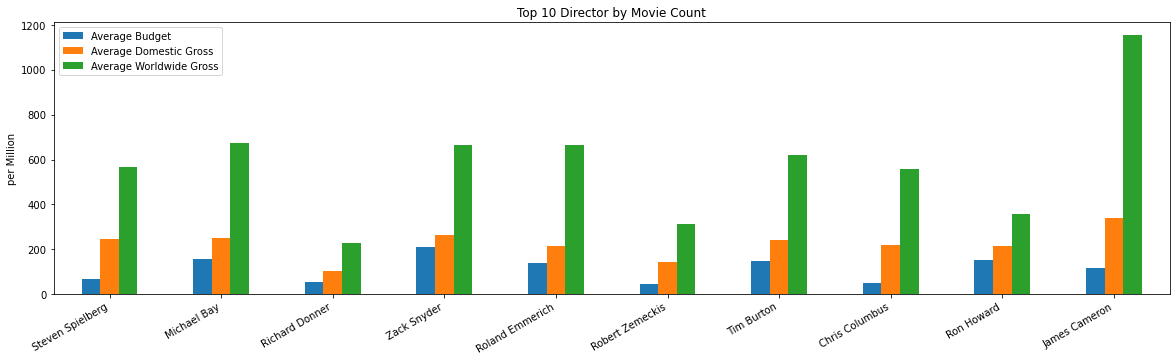

In [ ]:
#Director Average Bar Charts
#Bar Chart showing top ten directors by movie count, and their average budget to gross outcome
moviedirect10_df = moviedirect10_df.drop(["Number of Movies"], axis=1, inplace = False)
moviecountbar = moviedirect10_df.plot.bar(xlabel = "",ylabel="per Million", 
             title = "Top 10 Director by Movie Count", figsize=(20,5),)
plt.xticks(rotation=30, ha='right')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Rob Marshall'),
  Text(1, 0, 'Joss Whedon'),
  Text(2, 0, 'Roger Allers, Rob Minkoff'),
  Text(3, 0, 'Nathan Greno, Byron Howard'),
  Text(4, 0, 'Anthony Russo, Joe Russo'),
  Text(5, 0, 'Andrew Adamson'),
  Text(6, 0, 'Barry Sonnenfeld'),
  Text(7, 0, 'Colin Trevorrow'),
  Text(8, 0, 'Zack Snyder'),
  Text(9, 0, 'Marc Webb')])

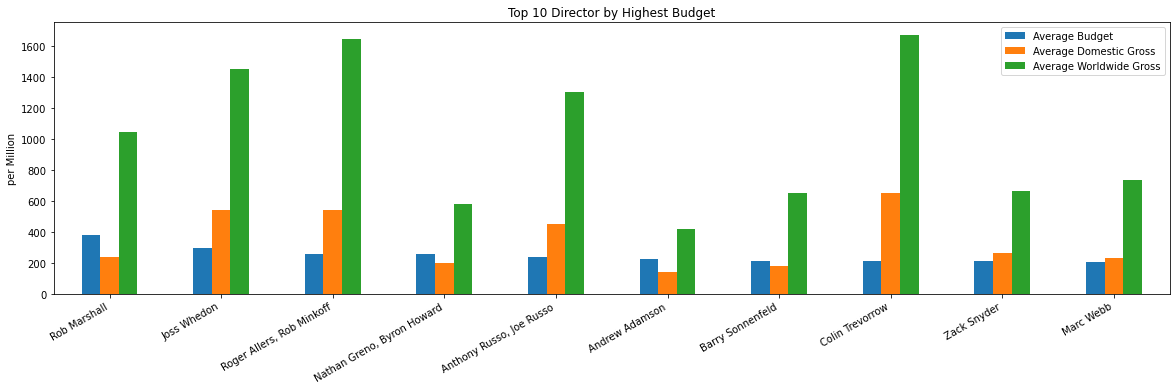

In [ ]:
#Bar Chart showing top ten directors by average budget, and showing their average budget to gross outcome
budgdirect10_df = budgdirect10_df.drop(["Number of Movies"], axis=1, inplace = False)
budgetbar = budgdirect10_df.plot.bar(xlabel = "",ylabel="per Million", 
             title = "Top 10 Director by Highest Budget", figsize=(20,5))
plt.xticks(rotation=30,ha='right')

**Bar Chart Analysis:** It is important to notice that there is no overelay in the directors between these two chart, so this is a good snip it of comparing the high average budget to number of movies made based upon the dataset provided. Overall these charts show that expeience does not equat to higher gross outcome, but budget does. This helps to back the thought that higher budget means higher gross outcome.

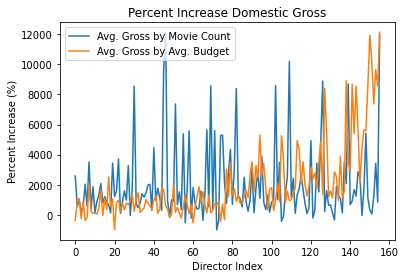

In [ ]:
#percent increase = (Gross income - budget)/budget
countdomgross = ((moviedirect_df["Average Domestic Gross"]-moviedirect_df["Average Budget"])/moviedirect_df["Average Budget"])*1000
budgetdomgross = ((budgdirect_df["Average Domestic Gross"]-budgdirect_df["Average Budget"])/budgdirect_df["Average Budget"])*1000

#Creating a dataframe for domestic gross income
perdomincrease = pd.DataFrame(zip(countdomgross,budgetdomgross))
perdomincrease.to_csv("datacreatedcsv/perdomincrease.csv", index_label="Director ID")
perdomincrease = pd.read_csv("datacreatedcsv/perdomincrease.csv")
perdomincrease = perdomincrease.rename(columns={"0":"Avg. Gross by Movie Count","1":"Avg. Gross by Avg. Budget"})

#Line chart for percent increase going from 0 (director with highest number of movie and highest average budget)
#160 (to lowest number of movies and lowest average budget)
perdomincrease = perdomincrease.drop(["Director ID"], axis=1, inplace = False)
domline = perdomincrease.plot.line(xlabel="Director Index", ylabel="Percent Increase (%)", 
            title = "Percent Increase Domestic Gross")

**Domestic Line Chart Anlysis:** For Average Percent Gross by Movie Count there seems to be no consistancy between the number of movies the direct has done and the percent gross. By comparison there is a noticable correlation between the average budget and the percent gross change. 

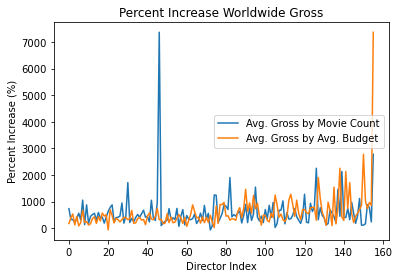

In [ ]:
#percent increase = (Gross income - budget)/budget
countworldgross = ((moviedirect_df["Average Worldwide Gross"]-moviedirect_df["Average Budget"])/moviedirect_df["Average Budget"])*100
budgetworldgross = ((budgdirect_df["Average Worldwide Gross"]-budgdirect_df["Average Budget"])/budgdirect_df["Average Budget"])*100

#Creating a dataframe for Worldwide gross income
perworldincrease = pd.DataFrame(zip(countworldgross,budgetworldgross))
perworldincrease.to_csv("datacreatedcsv/perworldincrease.csv", index_label="Director ID")
perworldincrease = pd.read_csv("datacreatedcsv/perworldincrease.csv")
perworldincrease = perworldincrease.rename(columns={"0":"Avg. Gross by Movie Count","1":"Avg. Gross by Avg. Budget"})

#Line chart for percent increase going from 0 (director with highest number of movie and highest average budget)
#160 (to lowest number of movies and lowest average budget)
perworldincrease = perworldincrease.drop(["Director ID"], axis=1, inplace = False)
worldline = perworldincrease.plot.line(xlabel="Director Index", ylabel="Percent Increase (%)", 
            title = "Percent Increase Worldwide Gross")

In [ ]:
#Finding the outlier for domestic and worldwide
cattaneo = allmovies_df.loc[(allmovies_df["Director"])=="Peter Cattaneo"]
cattaneo = cattaneo.drop(["Movie ID", "Rank", "Main Genre", "2nd Genre", "3rd Genre","IMDB Rating", "Studio","Year",
                        "IMDb ID"],axis=1, inplace = False)
cattaneo

,Title,Production Budget,Domestic Gross,Worldwide Gross,Director
138,The Full Monty,3.50,45.95,261.25,Peter Cattaneo


**Worldwide Line Chart Anlysis:** The line chart for the worldwide percent change shows about the same as the previous line chart. The big different are the clear outliers. The outlier for both movie count average movie budget is Peter Cattaneo. He made The Full Monty, and his percent change was about 7465%

### Overall Analysis

Based upon the analysis that was done it can be said that the number of movies that a director has done, or the director’s experience, does affect the gross domestic income more so than the production budget, but only to a point. That point happens to be when the average budget decreases and outweighs the director’s experience. In the worldwide gross does not appear to be affected by a director's experience, but does have the same result as the gross domestic. As the average budget decreases there is a higher likelihood of a high percent change. It is understandable for there to be a difference between the gross domestic and worldwide outcome. Majority of the movies and directors on this dataset are English speaking and/or American movies. On the domestic (American) side these directors would be known in the United States and would probably be sought out. Worldwide, these directors might not be known, so the director wouldn’t affect the gross outcome. Overall, yes, the direct does affect the gross outcome domestically, but it does not worldwide.